# Pregunta 1

In [1]:
import networkx as nx
import random as rd
from sknetwork.clustering import modularity, Louvain
import numpy as np
import seaborn as sbn

In [2]:
def my_edge_list(l):
    edge_list = []
    for edge in l:
        temp = edge.split()
        temp = map(int, temp)
        e = tuple(temp)
        edge_list.append(e)
    return edge_list

In [3]:
def self_partition_orientation(edge):
    n = rd.randint(0,1)
    if n == 0:
        return edge
    else:
        inverted = (edge[1], edge[0])
        return inverted

def cross_partition_orientation(left, right, p):
    n = rd.randint(0, 9)
    if n < 10 * p:
        return (left, right)
    else:
        return (right, left) 

def check_in_same_C(edge):

    #Checking both nodes are in C1
    if edge[0] < 50 and edge[1] < 50 or edge[0] > 99 and edge[0] < 150 and  edge[1] > 99 and edge[1] < 150 :
        return True
    elif edge[0] < 50 and edge[1] > 99 and edge[1] < 150:
        return True
    elif edge[1] < 50 and edge[0] > 99 and edge[0] < 150:
        return True
    #Checking both nodes are in C2
    elif edge[0] > 149 and edge[1] > 149 or edge[0] > 49 and edge[0] < 100 and  edge[1] > 49 and edge[1] < 100:
        return True
    elif edge[0] > 149 and edge[1] > 49 and edge[1] < 100:
        return True
    elif edge[1] > 149 and edge[0] > 49 and edge[0] < 100:
        return True
    else:
        return False

def orientation(edge, partition, p):
    if partition == 'b':
        if edge[0] < 100 and edge[1] < 100 or edge[0] > 99 and edge[1] > 99:
            e = self_partition_orientation(edge)
        else:
            left = min(edge[0], edge[1])
            right = max(edge[0], edge[1])
            e = cross_partition_orientation(left, right, p)
        return e
    elif partition == 'c':
        if check_in_same_C:
            e = self_partition_orientation(edge) 
        else:
            mn = min(edge[0], edge[1])
            mx = max(edge[0], edge[1])
            if mn < 50 or mn > 99 and mn < 150:
                left = mn
                right = mx
            else:
                left = mx
                right = mn
            e = cross_partition_orientation(left, right, p) 
        return e
    else:
        raise ValueError('No partition with the name:', partition)
    

In [4]:
def louvain_direct_modularity(G):
    louvain = Louvain(modularity='dugue')
    adj = nx.adjacency_matrix(G)
    labels = louvain.fit_transform(adj)
    ldm = modularity(adj, labels)
    return ldm

In [5]:

modul_B = np.zeros(11)
modul_C = np.zeros(11)

In [6]:
# Repetimos el experimento 100 veces para evitar el ruido en la medición
for i in range(100):
    print('Experimento n°:', 1 + i)

    #Generamos un grafo ER con probabilidad p = 0.2 y obtenemos su lista de aristas para pasarlo a grafo dirigido
    ER = nx.fast_gnp_random_graph(200, 0.2) 
    l = list(nx.generate_edgelist(ER, data=False))
    aristas = my_edge_list(l)
    aris_B = []
    aris_C = []
    DiER_B = nx.DiGraph()
    DiER_C = nx.DiGraph()

    #En este ciclo se define la dirección del arco de acuerdo a la partición y el valor de p en cada iteración 
    #y son almacenados en aris_B y aris_C respectivamente.
    for i in range(11):
        p = i * 0.1
        for aris in aristas:
            a = orientation(aris, 'b', p)
            b = orientation(aris, 'c', p)
            aris_B.append(a)
            aris_C.append(b)

        #Se añaden los aros a los grafos dirigidos
        DiER_B.add_edges_from(aris_B)
        DiER_C.add_edges_from(aris_C)

        #Se calcula la modularidad de cada uno de los digrafos
        print('Probabilidad p =', p)
        ldm_B = louvain_direct_modularity(DiER_B)
        print('Modularidad de B:', ldm_B)
        ldm_C = louvain_direct_modularity(DiER_C)
        print('Modularidad de C:', ldm_C)

        #Y se suman de acuerdo a la posición correspondiente a su probabilidad
        modul_B[i] += ldm_B
        modul_C[i] += ldm_C    
#

Experimento n°: 1
Probabilidad p = 0.0
Modularidad de B: 0.11153563355145737
Modularidad de C: 0.11135812016656738
Probabilidad p = 0.1
Modularidad de B: 0.13403978084417273
Modularidad de C: 0.11710364628344924
Probabilidad p = 0.2
Modularidad de B: 0.13150540895479035
Modularidad de C: 0.11594773333769548
Probabilidad p = 0.30000000000000004
Modularidad de B: 0.11891540369025017
Modularidad de C: 0.11251097190007431
Probabilidad p = 0.4
Modularidad de B: 0.11462795278731777
Modularidad de C: 0.11491087165938546
Probabilidad p = 0.5
Modularidad de B: 0.11861605993792798
Modularidad de C: 0.1130946051934964
Probabilidad p = 0.6000000000000001
Modularidad de B: 0.11505857205269926
Modularidad de C: 0.11323571843579117
Probabilidad p = 0.7000000000000001
Modularidad de B: 0.11022889646773326
Modularidad de C: 0.1082370742196172
Probabilidad p = 0.8
Modularidad de B: 0.10975518318002817
Modularidad de C: 0.11100189289466997
Probabilidad p = 0.9
Modularidad de B: 0.11083290524707234
Modula

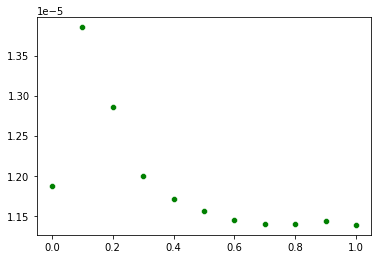

In [9]:
modul_B = modul_B / 100
modul_C = modul_C / 100

x = np.linspace(0,1,11)

B = sbn.scatterplot(x=x, y=modul_B, color="g")


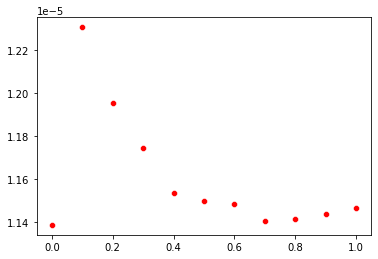

In [10]:
C = sbn.scatterplot(x=x, y=modul_C, color="r")



## Interpretación

Se encuentra en el informe

#### Notas y Referencias

La documentación de la ibrería Scikit-network (sknetwork) se encuentra en:
y fue escogida porque su algoritmo de Lovaina adaptado a digrafos (usando el algoritmo de modularida de Dugué) corresponde a la medida de modularidad modificada de Leicht y Newman. El paper de referencia de Dugué en el que analiza la optimización por Louvaina de modularidad directa con respecto a la modularidad clásica. Éste se encuentra en  este [enlace](https://hal.archives-ouvertes.fr/hal-01231784/document) y referencia directamente el paper de Leicht y Newman.